# **Avocado Dataset: Price and Region prediction**

By Darshik A S

### **Inroduction**

In this notebook, we try do some exploratory data analysis on the weekly sales avocado dataset. This study was carreid out for the two tasks:
* Classification
* Regression

In classification, we try to predict the Average Price of avocados based on different features and for the regression task we try to predict the regions based on the features. Then we try to find out the best performing regression models and classifiers.

### **Data Overview**
The dataset was downloaded from [GitHub](https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects). It is a single CSV file consisting of 1510 samples of scan data from retailers based on actual retail sales of Hass avocados. The data represent the retail volume, prices and bags sold in different regions on weekly basis. Some attributes in the dataset are:
  - **Date** - The date of observation
  - **AveragePrice** - The average price of a single avocado
  - **Total Volume** - Total number of avocados sold
  - **4046** - Total number of avocados with PLU 4046 sold
  - **4225** - Total number of avocados with PLU 4225 sold
  - **4770** - Total number of avocados with PLU 4770 sold
  - **Small Bags** - Total number of small bags sold
  - **Large Bags** - Total number of Large bags sold
  - **XLarge Bags** - Total number of XLarge bags sold
  - **type** - Conventional or organic
  - **year** - The year in which it is observed
  - **region** - The region of the observation

**Classification target variable** : Region

**Regression target variable** : Average price

### **Data Preparation**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read avocado dataset upto 1517 rows into the pandas Dataframe and drop the unamed index column
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y') # Parse date string in day-month-year format
df_avocado = pd.read_csv('avocado.csv',parse_dates=['Date'], date_parser=dateparse,nrows=1510).iloc[:,1:]

In [3]:
# Display top 3 samples
df_avocado.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [4]:
# Display bottom 3 samples
df_avocado.tail(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1507,2016-11-20,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,42721.62,6021.29,0.0,conventional,2016,Charlotte
1508,2016-11-13,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,38436.79,6940.87,0.0,conventional,2016,Charlotte
1509,2016-11-06,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,45861.67,6586.31,0.0,conventional,2016,Charlotte


In [5]:
# Check the data types and presence of null values
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1510 non-null   datetime64[ns]
 1   AveragePrice  1510 non-null   float64       
 2   Total Volume  1510 non-null   float64       
 3   4046          1510 non-null   float64       
 4   4225          1510 non-null   float64       
 5   4770          1510 non-null   float64       
 6   Total Bags    1510 non-null   float64       
 7   Small Bags    1510 non-null   float64       
 8   Large Bags    1510 non-null   float64       
 9   XLarge Bags   1510 non-null   float64       
 10  type          1510 non-null   object        
 11  year          1510 non-null   int64         
 12  region        1510 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 153.5+ KB


* Luckily the data is free of null values

In [6]:
# Check for duplicated samples from the same date and region
df_avocado.duplicated(['Date','region']).sum()

0

In [7]:
# Show data description
df_avocado.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,1510.0,1.073099e+00,1.872293e-01,0.49,0.9700,1.080,1.1900,1.68
Total Volume,1510.0,1.608490e+06,4.442346e+06,38750.74,147434.9350,405518.315,988636.4125,44655461.51
4046,1510.0,6.492110e+05,1.951699e+06,467.72,20274.5550,83117.910,380193.1150,18933038.04
4225,1510.0,6.140479e+05,1.676341e+06,1783.77,41477.5025,122367.655,486511.7675,18956479.74
4770,1510.0,5.054981e+04,1.380839e+05,0.00,893.1100,7557.340,30507.6375,1381516.11
Total Bags,1510.0,2.946815e+05,7.595647e+05,3311.77,36108.5275,74558.810,158040.0075,6736304.04
Small Bags,1510.0,2.496902e+05,6.488360e+05,3311.77,29681.8800,62661.870,146699.8625,5893641.72
Large Bags,1510.0,4.280025e+04,1.184666e+05,0.00,528.2325,4948.365,29937.1050,1121076.47
XLarge Bags,1510.0,2.191021e+03,7.471719e+03,0.00,0.0000,0.000,406.4300,108072.79
year,1510.0,2.015159e+03,3.657416e-01,2015.00,2015.0000,2015.000,2015.0000,2016.00


In [8]:
# Finding out the unique values and counts in each attributes of type object and also from the column 'year'
cols = ['type','year','region']
for i in cols:
  print(i)
  print(df_avocado[i].nunique())
  print(df_avocado[i].value_counts(),end='\n\n')

type
1
conventional    1510
Name: type, dtype: int64

year
2
2015    1270
2016     240
Name: year, dtype: int64

region
51
California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Charlotte              24
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse           

* There is only one type of avocado i.e. conventional, so we can drop that column. 
* The data consists of samples from 2015 and 2016
* The scanned data corresponds to 50 regions after neglecting TotalUS label, which is the overall consumption in the entire US.

*Note: Number of observations belonging to each region is highly imbalanced,  so it becomes difficult for the classification task*

In [9]:
# Removing TotalUS labeled rows
df_avocado = df_avocado[df_avocado['region']!='TotalUS']

In [10]:
# Drop type column
df_avocado.drop(columns=['type'],inplace=True)

In [11]:
# Checking whether the year is perfectly matching with the year in Date column
(df_avocado['Date'].dt.year != df_avocado.year).sum()

0

### **Exploring the Data**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context('notebook')

Skewness of Average price :  -0.14781639829370188


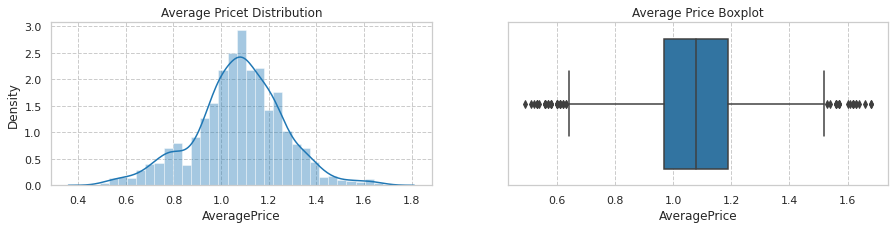

In [13]:
# Plot distribution of average price attribute

print("Skewness of Average price : ",df_avocado['AveragePrice'].skew()) # Skewness of the price attribute

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_avocado['AveragePrice'])
plt.title('Average Pricet Distribution')

plt.subplot(1,2,2)
sns.boxplot(df_avocado['AveragePrice'])
plt.title('Average Price Boxplot')

plt.show()

* The data appear to be normaly distributed with very low skewness
* There are outliers present in the average price distribution
* The median price comes close to $1.1

In [14]:
from scipy.stats import zscore
import numpy as np

In [15]:
# Identify the outliers in the average price distribution using z-score
z_avg_price = zscore(np.array(df_avocado.AveragePrice))
print('Number of outliers present :',(sum(z_avg_price > 3) + sum(z_avg_price < -3)))
print('Proportion of outliers present :',round((sum(z_avg_price > 3) + sum(z_avg_price < -3)) / len(z_avg_price)*100,2),'%')

Number of outliers present : 5
Proportion of outliers present : 0.34 %


* There is only 0.34 % of outliers present in the average price attribute, so we can remove it.

In [16]:
# Removing outliers
df_avocado = df_avocado[np.abs(zscore(np.array(df_avocado.AveragePrice))) <= 3]

Skewness of Total Volume :  2.2967795881480866


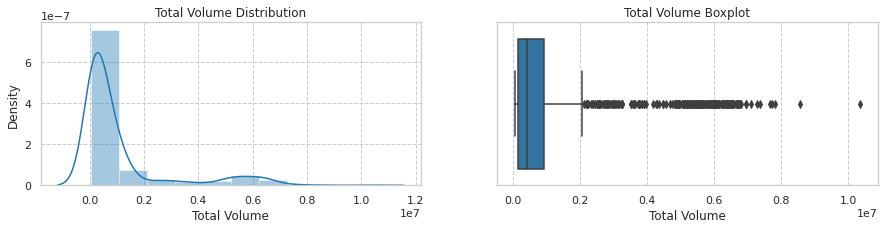

In [18]:
# Plot distribution of Total Volume attribute

print("Skewness of Total Volume : ",df_avocado['Total Volume'].skew())

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_avocado['Total Volume'],bins=10)
plt.title('Total Volume Distribution')

plt.subplot(1,2,2)
sns.boxplot(df_avocado['Total Volume'])
plt.title('Total Volume Boxplot')

plt.show()

* From the above plot, we see that the distribution of volume atributes are highly skewed. 
* Also, there are many outliers present in the volume attributes.

In [17]:
# Identify the outliers in the average price distribution using z-score
z_t_vol = zscore(np.array(df_avocado['Total Volume']))
print('Number of outliers present :',(sum(z_t_vol > 3) + sum(z_t_vol < -3)))
print('Proportion of outliers present :',round((sum(z_t_vol > 3) + sum(z_t_vol < -3)) / len(df_avocado)*100,2),'%')

Number of outliers present : 44
Proportion of outliers present : 2.97 %


* Using z score, it has detected more than 1% of outliers, so removing these many outliers will lose so much of information

Skewness of Total Bags :  3.350358591359405


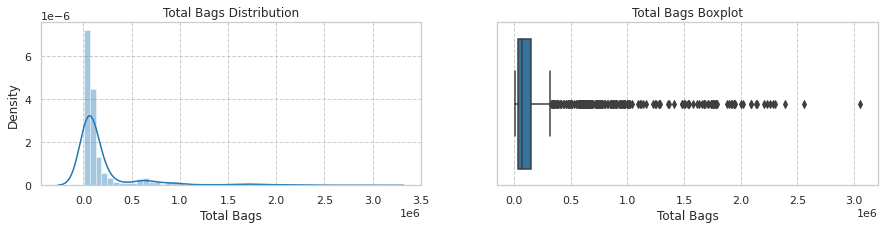

In [20]:
# Plot distribution of Total bags attribute

print("Skewness of Total Bags : ",df_avocado['Total Bags'].skew())

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df_avocado['Total Bags'])
plt.title('Total Bags Distribution')

plt.subplot(1,2,2)
sns.boxplot(df_avocado['Total Bags'])
plt.title('Total Bags Boxplot')
plt.show()

* Total Bags attribute is highly skewed and so many outliers are present

In [18]:
# Identify the outliers in the average price distribution using z-score
z_t_bag = zscore(np.array(df_avocado['Total Bags']))
print('Number of outliers present :',(sum(z_t_bag > 3) + sum(z_t_bag < -3)))
print('Proportion of outliers present :',round((sum(z_t_bag > 3) + sum(z_t_bag < -3)) / len(df_avocado)*100,2),'%')

Number of outliers present : 50
Proportion of outliers present : 3.38 %


* There is more than 1% of outliers, so removing these many outliers will lose so much of information.

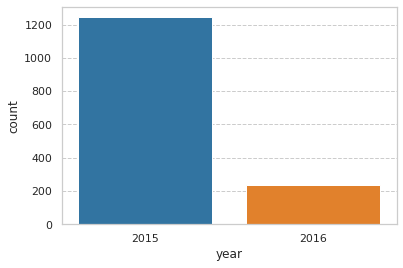

In [22]:
# Plot the number of observations in each year

sns.countplot(data=df_avocado,x='year')
plt.show()

* There are large number of observations in 2015 than in 2016

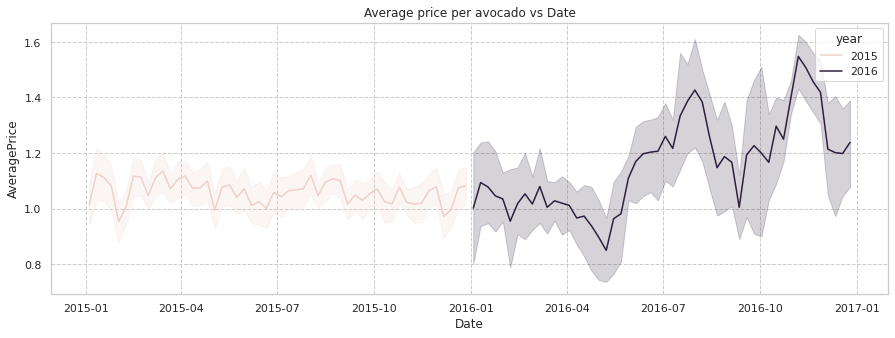

In [23]:
# PLot the distribution of average price over the date

plt.figure(figsize=(15,5))
sns.lineplot(data=df_avocado,x='Date',y='AveragePrice',hue='year')
plt.title('Average price per avocado vs Date')
plt.show()

* The average prices of avocado in the year 2015 is almost stationary.
* In 2016, the prices are varying cyclically with a linear growth

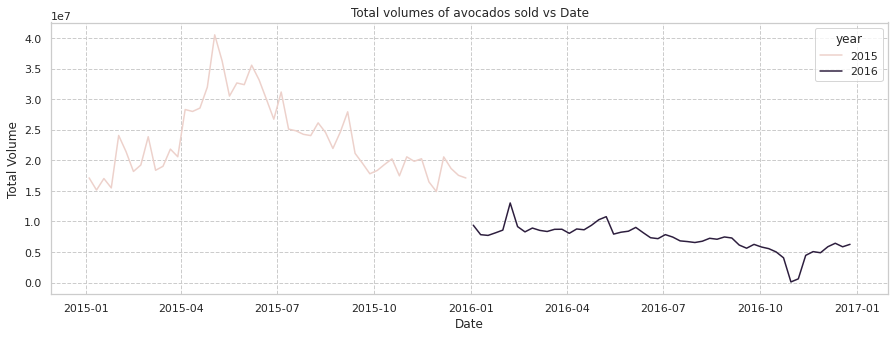

In [24]:
# Plot the total volumes of avocados sold over the entire regions in the US

plt.figure(figsize=(15,5))
sum_total_volume = df_avocado.groupby('Date',as_index=False)
sns.lineplot(data=sum_total_volume.sum(),x='Date',y='Total Volume',hue=sum_total_volume[['year']].agg(pd.Series.mode)['year'])
plt.title('Total volumes of avocados sold vs Date')
plt.show()

* Total volume of avocados sold is highest in the month of May in 2015
* The total volume of avocados sold has been decreasing from June in the year 2015
* In the year 2016, the total volume of avocados sold is relatively less, yet the prices are still higher. This could be due to undersupply of avocados in many regions. 

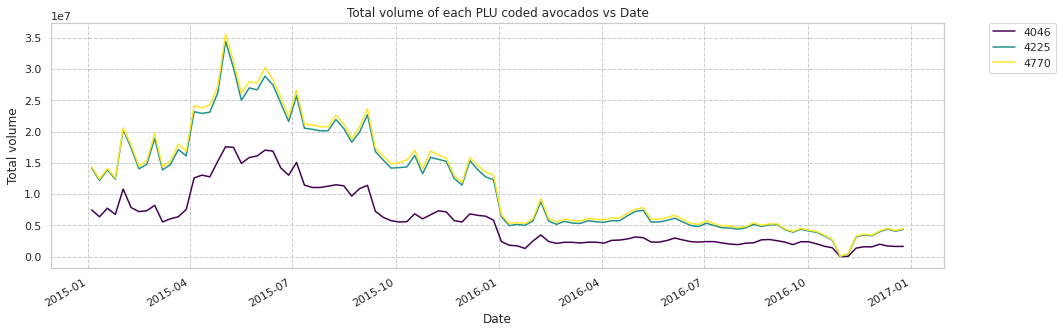

In [25]:
# Plot the volume of total PLU coded avocados sold over the date

ind = ['4046','4225','4770','Date','Total Volume']
fig = df_avocado[ind].groupby('Date',as_index=False).sum().sort_values('Total Volume').iloc[:,:-1].set_index('Date')
fig.plot(kind='line',stacked=True,figsize=(16,5),cmap='viridis')
plt.ylabel('Total volume')
plt.title('Total volume of each PLU coded avocados vs Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


* 4046 and 4225 PLU coded avocados are in larger demand than 4770

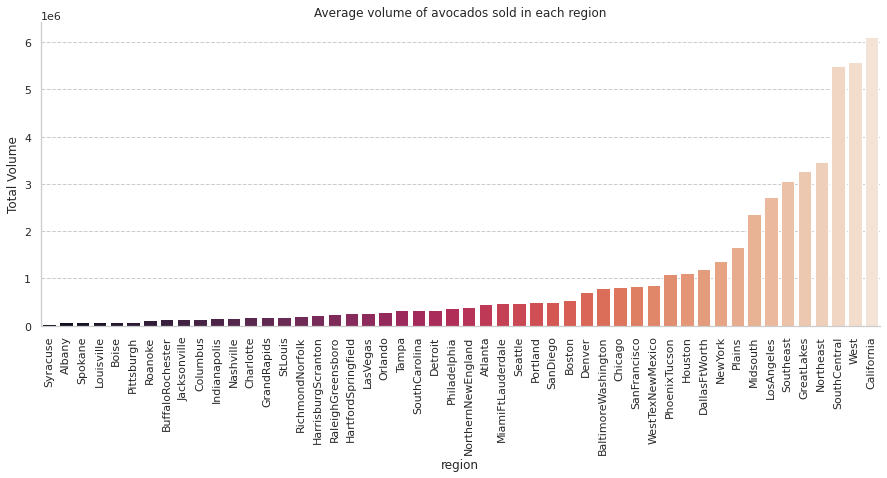

In [26]:
# Plot the average volumes of avocados sold in each region

avg_price = df_avocado.groupby('region',as_index=False).mean().sort_values('Total Volume')
ax = sns.factorplot(data=avg_price,x='region',y='Total Volume',kind='bar',height=5,aspect=2.5,palette='rocket')
plt.setp(ax.ax.lines,linewidth=1)
ax.set_xticklabels(rotation=90)
plt.title('Average volume of avocados sold in each region')
plt.show()

* The demand is higher in the regions:
  - California
  - West
  - South Central
  - Northeast
  - GreatLakes

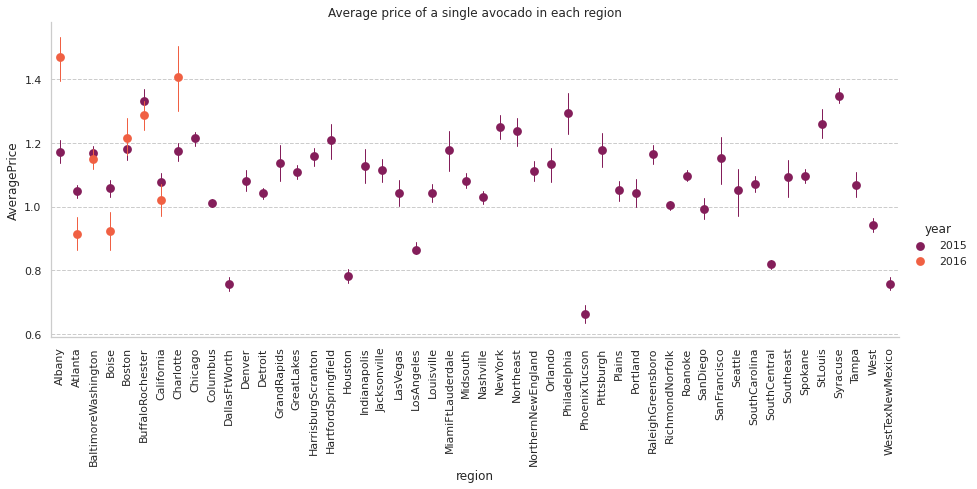

In [27]:
# Plot the average price of a single avocado in each region

ax = sns.factorplot(data=df_avocado,x='region',y='AveragePrice',kind='point',hue='year',height=5,join=False,aspect=2.5,palette='rocket')
plt.setp(ax.ax.lines,linewidth=1)
ax.set_xticklabels(rotation=90)
plt.title('Average price of a single avocado in each region')
plt.show()

* Top 5 regions having the higher average price in 2015: 
  - Syracuse
  - Buffalo Rochester
  - Philadelphia
  - St Louis
  - New York

* The higher price in the above regions is due to the lower demand
* In 2015, the avearge prices was lower in the regions: 
  - Phoenix Tucson
  - Dallas Ft Worth
  - West Tex New Mexico
  - Houston
  - South Central
* There are only few regions with data from 2016

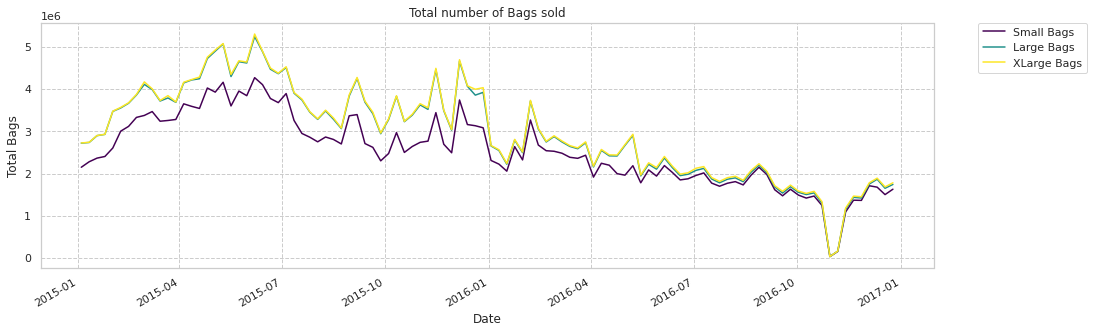

In [28]:
# Plotting total number of bags sold

ind = ['Small Bags','Large Bags','XLarge Bags','Date','Total Bags']
fig = df_avocado[ind].groupby('Date',as_index=False).sum().sort_values('Total Bags').iloc[:,:-1].set_index('Date')
fig.plot(kind='line',stacked=True,figsize=(16,5),cmap='viridis')
plt.ylabel('Total Bags')
plt.title('Total number of Bags sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


* Avocados are sold largely in Large and XLarge Bags 

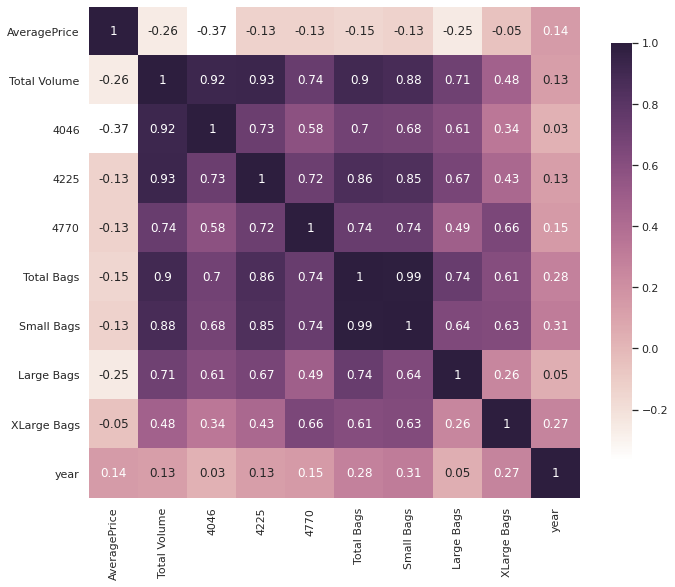

In [29]:
# Plotting heatmap of feature correlation
plt.figure(figsize=(11,11))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(data=round(df_avocado.select_dtypes(exclude=['object','datetime64[ns]']).corr(),2),square=True, cmap=cmap, cbar_kws={"shrink": .7},annot=True)
plt.show()

* Total volume, 4046, 4225, 4770, Total Bags and small bags attributes are highly correlated to one another.
* XLarge bags attribute is moderately correlated to Total volume, 4046, 4225, 4770, Total Bags, small bags and large bags attributes
* There is no high correlation between the independent variables and dependent variable

### **Feature engineering**

#### **1. Prepare data for regression**

In [19]:
# Remove date column
data = df_avocado.drop(columns=['Date','region'])

In [20]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [21]:
x_reg = data.iloc[:,1:]
y_reg = data.iloc[:,0]

In [22]:
# Check the skewness of the data
x_reg.skew()

Total Volume    2.296780
4046            2.633631
4225            2.070686
4770            3.108661
Total Bags      3.350359
Small Bags      3.544222
Large Bags      4.376472
XLarge Bags     6.854831
year            1.862237
dtype: float64

All the varibles are highly skewed, so we can apply boxcox transformation on all the variables except on year attribute which is binary

In [23]:
from scipy.stats import boxcox

In [24]:
# Apply boxcox transformation to reduce the skewness

# Varibales having minimum value of 0 is incremented by a constant for applying boxcox
add_const = ['4770','Large Bags','XLarge Bags']  

for i in x_reg.iloc[:,:-1].columns:
  print(i,'Skewness before : ',x_reg[i].skew())
  if i in add_const:
    d_t = x_reg[i] + 1  # Add 1 as constant to these attributes,
  else:
    d_t = x_reg[i]
  fitted_data, _ = boxcox(d_t)
  x_reg[i] = fitted_data
  print(i,'Skewness after : ',x_reg[i].skew())

Total Volume Skewness before :  2.2967795881480866
Total Volume Skewness after :  0.06150240455728053
4046 Skewness before :  2.6336306265250604
4046 Skewness after :  -0.031102756331274878
4225 Skewness before :  2.0706857927169238
4225 Skewness after :  -0.00011343567127062244
4770 Skewness before :  3.1086610578144827
4770 Skewness after :  -0.053469908454895056
Total Bags Skewness before :  3.350358591359405
Total Bags Skewness after :  0.0075694807483025735
Small Bags Skewness before :  3.544221939058992
Small Bags Skewness after :  0.025053753443744557
Large Bags Skewness before :  4.376472057136557
Large Bags Skewness after :  -0.10850507711817699
XLarge Bags Skewness before :  6.854831308277198
XLarge Bags Skewness after :  0.43839392237907093


In [25]:
# Encode years as binary
x_reg['year'].replace({2015:0,2016:1},inplace=True)

In [26]:
from sklearn.decomposition import PCA

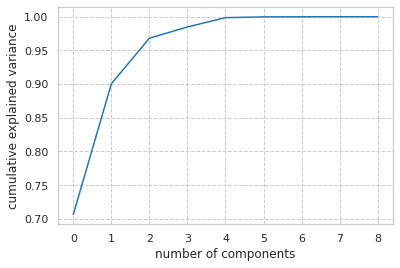

In [27]:
# Apply PCA for choosing number of components
pca = PCA().fit(x_reg)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* From the plot we see that we require minimum of 5 components to contain 100% of the variance.

In [28]:
# Apply PCA with first 5 components
pca_reg = PCA(n_components=5).fit_transform(x_reg)

In [29]:
print('Shape of independant feature data : ',pca_reg.shape)
print('Shape of dependant feature data : ',y_reg.shape)

Shape of independant feature data :  (1480, 5)
Shape of dependant feature data :  (1480,)


#### **2. Prepare data for classification**

In [30]:
# Remove date column
data = df_avocado.drop(columns=['Date'])

In [31]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [32]:
x_clf = data.iloc[:,:-1]
y_clf = data.iloc[:,-1]

In [33]:
# Checking skewnwss
x_clf.skew()

AveragePrice   -0.202077
Total Volume    2.296780
4046            2.633631
4225            2.070686
4770            3.108661
Total Bags      3.350359
Small Bags      3.544222
Large Bags      4.376472
XLarge Bags     6.854831
year            1.862237
dtype: float64

In [34]:
# Apply boxcox transformation to reduce the skewness

# Varibales having minimum value of 0 is incremented by a constant for applying boxcox
add_const = ['4770','Large Bags','XLarge Bags']  

for i in x_clf.iloc[:,:-1].columns:
  print(i,'Skewness before : ',x_clf[i].skew())
  if i in add_const:
    d_t = x_clf[i]+1  # Add 1 as constant to these attributes,
  else:
    d_t = x_clf[i]
  fitted_data, _ = boxcox(d_t)
  x_clf[i] = fitted_data
  print(i,'Skewness after : ',x_clf[i].skew())

AveragePrice Skewness before :  -0.20207701683848736
AveragePrice Skewness after :  0.020775450870231523
Total Volume Skewness before :  2.2967795881480866
Total Volume Skewness after :  0.06150240455728053
4046 Skewness before :  2.6336306265250604
4046 Skewness after :  -0.031102756331274878
4225 Skewness before :  2.0706857927169238
4225 Skewness after :  -0.00011343567127062244
4770 Skewness before :  3.1086610578144827
4770 Skewness after :  -0.053469908454895056
Total Bags Skewness before :  3.350358591359405
Total Bags Skewness after :  0.0075694807483025735
Small Bags Skewness before :  3.544221939058992
Small Bags Skewness after :  0.025053753443744557
Large Bags Skewness before :  4.376472057136557
Large Bags Skewness after :  -0.10850507711817699
XLarge Bags Skewness before :  6.854831308277198
XLarge Bags Skewness after :  0.43839392237907093


In [35]:
# Encode years as binary
x_clf['year'].replace({2015:0,2016:1},inplace=True)

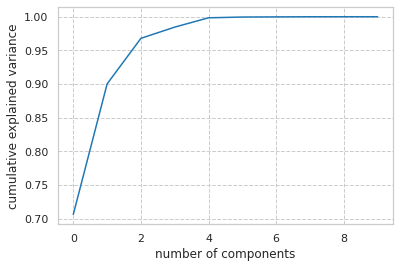

In [36]:
# Apply PCA for choosing number of components
pca = PCA().fit(x_clf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [37]:
# Apply PCA with first 5 components
pca_clf = PCA(n_components=5).fit_transform(x_clf)

In [38]:
# Label encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(y_clf)
y_clf = le

In [39]:
print('Shape of independant feature data : ',pca_clf.shape)
print('Shape of dependant feature data : ',y_clf.shape)

Shape of independant feature data :  (1480, 5)
Shape of dependant feature data :  (1480,)


### **Training model and evalutaion**

#### **1. Regression**

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,cross_validate
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
# Find out random state for best possible arrangement of train and test data
random_state = []
for i in range(1,101):
  x_train, x_test, y_train, y_test = train_test_split(pca_reg,y_reg,test_size=0.25,random_state=i)
  model = LinearRegression().fit(x_train,y_train)
  random_state.append(model.score(x_test,y_test))
print('Best random state : ',random_state.index(max(random_state))+1)

Best random state :  65


In [42]:
# Split data into training and testing folds
x_train, x_test, y_train, y_test = train_test_split(pca_reg,y_reg,test_size=0.25,random_state=65)

In [43]:
# Create a dictionary for pipelines
models_dict = {
    'LNR': Pipeline([('Scaler', StandardScaler()),('LNR', LinearRegression())]),
    'P2R': Pipeline([('P2R',PolynomialFeatures(degree=2)),('Scaler', StandardScaler()),('L2R', LinearRegression())]),
    'P3R': Pipeline([('P3R',PolynomialFeatures(degree=3)),('Scaler', StandardScaler()),('L3R', LinearRegression())]),
    'P4R': Pipeline([('P4R',PolynomialFeatures(degree=4)),('Scaler', StandardScaler()),('L4R', LinearRegression())]),
    'RDR': Pipeline([('Scaler', StandardScaler()),('RDR', Ridge())]),
    'SVR': Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]),
    'KNR': Pipeline([('Scaler', StandardScaler()),('KNR', KNeighborsRegressor())]),
    'DTR': Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())]),
}

In [44]:
# Evaluate models
cv_score = {}
for model in models_dict:
  print('----------',model,'----------')
  pipe = models_dict[model]
  kfold = KFold(n_splits=9,random_state=65)
  cv_results = cross_validate(pipe, x_train, y_train,scoring='r2', cv=kfold)
  cv_score[model] = cv_results['test_score']
  print('R2 Score : ',round(cv_results['test_score'].mean(),3),' +/-',round(cv_results['test_score'].std(),3))

---------- LNR ----------
R2 Score :  0.279  +/- 0.039
---------- P2R ----------
R2 Score :  0.461  +/- 0.062
---------- P3R ----------
R2 Score :  0.578  +/- 0.022
---------- P4R ----------
R2 Score :  0.63  +/- 0.032
---------- RDR ----------
R2 Score :  0.279  +/- 0.039
---------- SVR ----------
R2 Score :  0.663  +/- 0.017
---------- KNR ----------
R2 Score :  0.686  +/- 0.05
---------- DTR ----------
R2 Score :  0.427  +/- 0.121


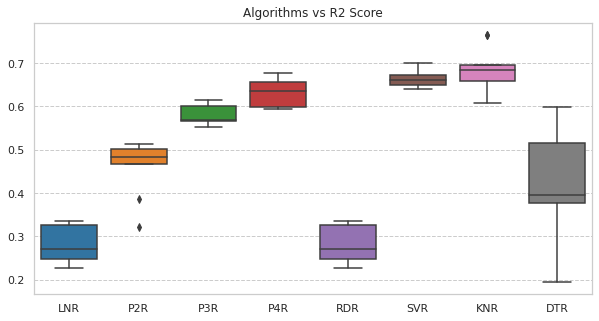

In [45]:
df = pd.DataFrame(cv_score)
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Algorithms vs R2 Score')
plt.show()

* KNN regressor and SVM regressor is having the highest mean r2 score, therefore we can consider these two models for hyper-parameter tuning.
* Top performing models :
  - KNN regressor
  - Support Vector Machine

#### Hyper parameter tuning

In [137]:
# KNN regressor
params = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1,30)),
    'p': [1,2],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=65)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=params, scoring='r2', cv=kfold)
knn_pipe = make_pipeline(scaler,grid)
knn_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.724783 using {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 2, 'p': 2}


In [138]:
# Prediction
y_pred = knn_pipe.predict(x_test)
print('MAE: %0.3f'%mean_absolute_error(y_test, y_pred))
print('MSE: %0.3f'%mean_squared_error(y_test, y_pred))
print('RMSE: %0.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %0.3f'%r2_score(y_test, y_pred),end='\n\n')

MAE: 0.073
MSE: 0.010
RMSE: 0.100
R2 Score: 0.722



In [127]:
# SVM regressor
params = {
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000]
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=65)
grid = GridSearchCV(SVR(), param_grid=params, scoring='r2', cv=kfold)
svm_pipe = make_pipeline(scaler,grid)
svm_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.728155 using {'C': 1, 'gamma': 0.6}


In [128]:
# Prediction
y_pred = svm_pipe.predict(x_test)
print('MAE: %0.3f'%mean_absolute_error(y_test, y_pred))
print('MSE: %0.3f'%mean_squared_error(y_test, y_pred))
print('RMSE: %0.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %0.3f'%r2_score(y_test, y_pred),end='\n\n')

MAE: 0.073
MSE: 0.009
RMSE: 0.095
R2 Score: 0.749



* KNN and SVM are almost performing equaly after parameter tuning.
* SVM regressor has achieved the highest r2 score

In [47]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [67]:
# Load ensemle model pipelines in a dictionary
ensembles_dict = {
    'RFR': Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())]),
    'ETR': Pipeline([('Scaler', StandardScaler()),('ETR', ExtraTreesRegressor())]),
    'ABR': Pipeline([('Scaler', StandardScaler()),('ABR', AdaBoostRegressor())]),
    'GBR': Pipeline([('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor())]),
    }

In [58]:
# Evaluate ensemble models
cv_score = {}
for model in ensembles_dict:
  print('-----',model,'-----')
  pipe = ensembles_dict[model]
  kfold = KFold(n_splits=9,random_state=65)
  cv_results = cross_validate(pipe, x_train, y_train,scoring='r2', cv=kfold)
  cv_score[model] = cv_results['test_score']
  print('R2 Score : ',round(cv_results['test_score'].mean(),3),' +/-',round(cv_results['test_score'].std(),3))

----- RFR -----
R2 Score :  0.695  +/- 0.034
----- ETR -----
R2 Score :  0.75  +/- 0.032
----- ABR -----
R2 Score :  0.505  +/- 0.049
----- GBR -----
R2 Score :  0.632  +/- 0.028


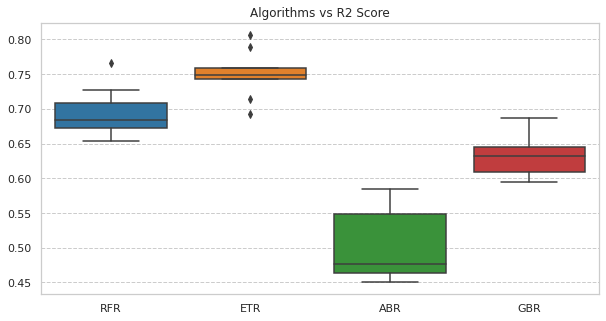

In [59]:
# Plot the r2 score of the algorithms
df = pd.DataFrame(cv_score)
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Algorithms vs R2 Score')
plt.show()

* Random forest and extra tree regressor has the highest median score
* We try to see whihc models performs well after hyper parameter tuning 
* Top performing ensemble models
  - Extra Trees Regressor
  - Random Forest Regressor

In [48]:
# Extra Trees Regressor
params = {
    'n_estimators': [50,75,100,125,150],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [2,3,4],
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=65)
grid = GridSearchCV(ExtraTreesRegressor(), param_grid=params, scoring='r2', cv=kfold)
etr_pipe = make_pipeline(scaler,grid)
etr_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.756616 using {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}


In [49]:
# Prediction
y_pred = etr_pipe.predict(x_test)
print('MAE: %0.3f'%mean_absolute_error(y_test, y_pred))
print('MSE: %0.3f'%mean_squared_error(y_test, y_pred))
print('RMSE: %0.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %0.3f'%r2_score(y_test, y_pred),end='\n\n')

MAE: 0.066
MSE: 0.008
RMSE: 0.091
R2 Score: 0.773



In [134]:
# Random Forest Regressor
params = {
    'n_estimators': [20,30,50],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_split': [2,4,8],
    'bootstrap': [True, False]
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=65)
grid = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring='r2', cv=kfold)
rfr_pipe = make_pipeline(scaler,grid)
rfr_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.720401 using {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}


In [135]:
# Prediction
y_pred = rfr_pipe.predict(x_test)
print('MAE: %0.3f'%mean_absolute_error(y_test, y_pred))
print('MSE: %0.3f'%mean_squared_error(y_test, y_pred))
print('RMSE: %0.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: %0.3f'%r2_score(y_test, y_pred),end='\n\n')

MAE: 0.070
MSE: 0.009
RMSE: 0.096
R2 Score: 0.745



* From the predictions we see that the ensemble model Extra Tree Regressor has outperformed the Random Forest Regressor.
* The Support Vector Machine manages to perform slightly better than the Random Forest regressor.
* Extra tree regressor has achieved the best performance on predicting the average price with r2 score of 0.769.

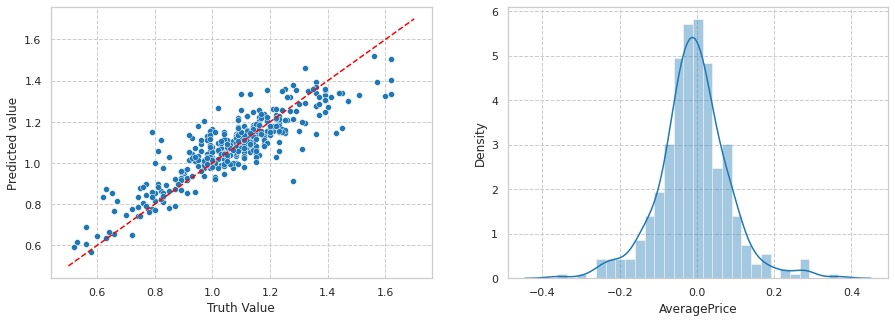

In [161]:
# Plot the Truth vs Predicted scatter plot and the erorr distribution
y_pred = etr_pipe.predict(x_test)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=list(y_test),y=y_pred)
sns.lineplot(x=[0.5,1.7],y=[0.5,1.7],linestyle='--',color='red')
plt.xlabel('Truth Value')
plt.ylabel('Predicted value')
plt.title('Truth vs Prediction')
plt.subplot(1,2,2)
sns.distplot(y_test-y_pred)
plt.title('Error Distribution')
plt.show()

* The errors are normaly distributed, which means our model was a correct choice for the data

In [50]:
y_pred = etr_pipe.predict(x_test)

In [51]:
prediction = pd.DataFrame(np.array([np.array(y_test),np.array(y_pred)]).T,columns=['True','Pred'])
prediction.to_csv('avocado_regression_results.csv',index=False)

In [53]:
import joblib
joblib.dump(etr_pipe,'avocado_price_prediction_regressor.pkl')

['avocado_price_prediction_regressor.pkl']

#### **1. Classification**

In [54]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [168]:
# Find out random state for best possible arrangement of train and test data
random_state = []
for i in range(1,101):
  x_train, x_test, y_train, y_test = train_test_split(pca_clf,y_clf,test_size=0.25,random_state=i)
  model = LogisticRegression().fit(x_train,y_train)
  random_state.append(model.score(x_test,y_test))
print('Best random state : ',random_state.index(max(random_state))+1,max(random_state))

Best random state :  62 0.8972972972972973


In [55]:
# Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(pca_clf,y_clf,test_size=0.25,random_state=62)

In [56]:
# Create dictionary for clasfifiers
models_dict = {
    'RDC': Pipeline([('Scaler', StandardScaler()),('RDC', RidgeClassifier())]),
    'LGC': Pipeline([('Scaler', StandardScaler()),('LGC', LogisticRegression())]),
    'SGD': Pipeline([('Scaler', StandardScaler()),('SGD', SGDClassifier())]),
    'LDA': Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())]),
    'SVM': Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]),
    'KNC': Pipeline([('Scaler', StandardScaler()),('KNC', KNeighborsClassifier())]),
    'DTC': Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())]),
}

In [57]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [58]:
# crossvalidation of the classifiers
cv_score = {}
for model in models_dict:
  print('-----',model,'-----')
  pipe = models_dict[model]
  kfold = KFold(n_splits=9,random_state=62)
  cv_results = cross_validate(pipe, x_train, y_train,scoring='accuracy', cv=kfold)
  cv_score[model] = cv_results['test_score']
  print('R2 Score : ',round(cv_results['test_score'].mean(),3),' +/-',round(cv_results['test_score'].std(),3))

----- RDC -----
R2 Score :  0.335  +/- 0.035
----- LGC -----
R2 Score :  0.747  +/- 0.056
----- SGD -----
R2 Score :  0.551  +/- 0.025
----- LDA -----
R2 Score :  0.849  +/- 0.029
----- SVM -----
R2 Score :  0.83  +/- 0.044
----- KNC -----
R2 Score :  0.869  +/- 0.035
----- DTC -----
R2 Score :  0.786  +/- 0.025


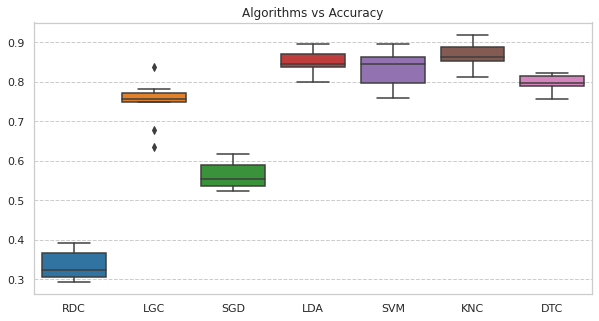

In [74]:
# Plot the accuracies of the classfiers
df = pd.DataFrame(cv_score)
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Algorithms vs Accuracy')
plt.show()

* KNN , SVM and LDA classifier has the highest median accuracies, So we use these models for the hyperparameter tuning.
* Best performing classifiers :
  * KNN classifier.
  * SVM
  * Linear Discriminant Classifier

In [75]:
# KNN classifier
params = {
    'leaf_size': list(range(1,6)),
    'n_neighbors': list(range(1,10)),
    'p': [1,2],
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=62)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
knc_pipe = make_pipeline(scaler,grid)
knc_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.913498 using {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}


In [76]:
# LDA classifier
params = {
    'solver':['svd', 'lsqr', 'eigen'],
    'shrinkage':np.arange(0, 1, 0.01)
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=62)
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=params, scoring='accuracy', cv=kfold)
lda_pipe = make_pipeline(scaler,grid)
lda_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.846818 using {'shrinkage': 0.01, 'solver': 'lsqr'}


In [59]:
# SVM classifier
params = {
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000]
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=62)
grid = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=kfold)
svc_pipe = make_pipeline(scaler,grid)
svc_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.927033 using {'C': 10, 'gamma': 0.9}


In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [79]:
ensembles_dict = {
    'RFC': Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())]),
    'ETC': Pipeline([('Scaler', StandardScaler()),('ETC', ExtraTreesClassifier())]),
    'BGC': Pipeline([('Scaler', StandardScaler()),('BGC', BaggingClassifier())]),
    }

In [80]:
cv_score = {}
for model in ensembles_dict:
  print('-----',model,'-----')
  pipe = ensembles_dict[model]
  kfold = KFold(n_splits=9,random_state=62)
  cv_results = cross_validate(pipe, x_train, y_train,scoring='accuracy', cv=kfold)
  cv_score[model] = cv_results['test_score']
  print('R2 Score : ',round(cv_results['test_score'].mean(),3),' +/-',round(cv_results['test_score'].std(),3)*2)

----- RFC -----
R2 Score :  0.883  +/- 0.06
----- ETC -----
R2 Score :  0.912  +/- 0.06
----- BGC -----
R2 Score :  0.845  +/- 0.086


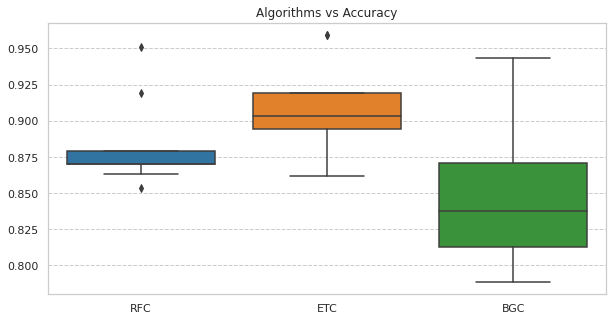

In [81]:
df = pd.DataFrame(cv_score)
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Algorithms vs Accuracy')
plt.show()

Top performing classifier is Extra Trees Classifier

In [82]:
# Extra Trees Classifier
params = {
    'n_estimators': [50,75,100,125,150],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [2,3,4],
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=62)
grid = GridSearchCV(ExtraTreesClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
etc_pipe = make_pipeline(scaler,grid)
etc_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.916208 using {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}


In [83]:
# Random Forest Classifier
params = {
    'n_estimators': [100, 150],
    'max_depth': [3,4,5,6],
    'max_features': ["sqrt"],
    'min_samples_split': [2,4,8],
    'bootstrap': [True, False]
    }

scaler = StandardScaler()
kfold = KFold(n_splits=9,random_state=62)
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy', cv=kfold)
rfc_pipe = make_pipeline(scaler,grid)
rfc_pipe.fit(x_train,y_train)
print('Best: %f using %s' % (grid.best_score_, grid.best_params_))

Best: 0.792792 using {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 150}


In [93]:
# Prediction
models = [svc_pipe,knc_pipe,lda_pipe,etc_pipe,rfc_pipe]
model_names = ['SVM','KNN','LDA','ETC','RFC']
results = {}
for i in range(len(models)):
  pred = models[i].predict(x_test)
  results[model_names[i]] = dict(
      accuracy=accuracy_score(y_test,pred),
      f1score=f1_score(y_test,pred,average='macro'),
      precision=precision_score(y_test,pred,average='macro'),
      recall=recall_score(y_test,pred,average='macro')
      )
round(pd.DataFrame(results),3)

,SVM,KNN,LDA,ETC,RFC
accuracy,0.941,0.916,0.865,0.930,0.822
f1score,0.929,0.900,0.851,0.926,0.752
precision,0.932,0.908,0.853,0.932,0.796
recall,0.937,0.914,0.879,0.932,0.770


* Support vector machine has achieved the highest performace after hyper parameter tuning.
* Comparing to other models it has the highest precision and recall score

In [60]:
y_pred = svc_pipe.predict(x_test)

In [61]:
prediction = pd.DataFrame(np.array([np.array(y_test),np.array(y_pred)]).T,columns=['True','Pred'])
prediction.to_csv('Avocado_classification_results.csv',index=False)

In [62]:
import joblib
joblib.dump(svc_pipe,'avocado_region_prediction_classifier.pkl')

['avocado_region_prediction_classifier.pkl']

### **Conclusion**

In this project, the hass avocado dataset has been applied for the prediction of avocado prices and regions. The dataset had to be processed separately for both the classification and regression task. The processed dataset is then used to train different classifiers and regression models. In regression task, Extra tree ensemble classifier was able to achieve an R2 score of 0.77. In classification task, support vector machine was able to achieve 94.1 % accuracy.